Found 75 images belonging to 4 classes.
Found 75 images belonging to 4 classes.


Epoch 1/75
2/2 [==============================] - 1s 431ms/step - loss: 2.0074 - accuracy: 0.2326 - val_loss: 1.3694 - val_accuracy: 0.3438
Epoch 2/75
2/2 [==============================] - 1s 475ms/step - loss: 1.3568 - accuracy: 0.2791 - val_loss: 1.3563 - val_accuracy: 0.2812
Epoch 3/75
2/2 [==============================] - 1s 348ms/step - loss: 1.3773 - accuracy: 0.2969 - val_loss: 1.3554 - val_accuracy: 0.4688
Epoch 4/75
2/2 [==============================] - 1s 513ms/step - loss: 1.3563 - accuracy: 0.3488 - val_loss: 1.3482 - val_accuracy: 0.4531
Epoch 5/75
2/2 [==============================] - 1s 268ms/step - loss: 1.3683 - accuracy: 0.3488 - val_loss: 1.3373 - val_accuracy: 0.3906
Epoch 6/75
2/2 [==============================] - 1s 265ms/step - loss: 1.3137 - accuracy: 0.3256 - val_loss: 1.3403 - val_accuracy: 0.3750
Epoch 7/75
2/2 [==============================] - 1s 445ms/step - loss: 1.4804 - accuracy: 0.1860 - val_loss: 1.3798 - val_accuracy: 0.2969
Epoch 8/75
2/2 [====

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


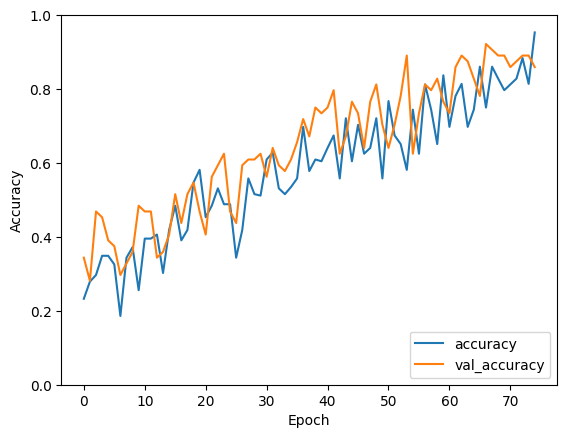

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Setting image dimensions:
img_width, img_height = 150, 150  

#Preparing data generators for loading the images:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#Loading the images from the directory and apply data augmentation for training set:
train_generator = train_datagen.flow_from_directory(
    '/Users/damonharrington/Downloads/Currency',  
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')  

#Loading images from the directory for the validation set:
validation_generator = test_datagen.flow_from_directory(
    '/Users/damonharrington/Downloads/Currency',  
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')  

#Building the CNN model:
model = Sequential()

#Convolutional layer with 32 filters and 3x3 kernel:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding more convolutional layers:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening the 3D output to 1D:
model.add(Flatten())

#Fully connected layer:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

#Output layer for classification (4 classes - RUPEES, USD, EUROS, GBP)
model.add(Dense(4, activation='softmax'))

#Compiling the model:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Training the model:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=75,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

#Saving the trained model:
model.save('currency_classifier.h5')

#Ploting training history (accuracy and loss):
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Loading and preprocess the test image:
test_image_path = '2000rs.jpeg'  
img_width, img_height = 150, 150  

#Loading the image and resize to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Convert the image to an array and add a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0) 
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1) 

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys()) 
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)

1/1 [==============================] - 0s 58ms/step
Predicted Class: RUPEES


In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Loading and preprocessing the test image:
test_image_path = 'gbp.jpeg' 
img_width, img_height = 150, 150 

#Loading the image and resize to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Converting the image to an array and adding a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1)  

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys()) 
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)

1/1 [==============================] - 0s 13ms/step
Predicted Class: GBP


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Loading and preprocessing the test image:
test_image_path = 'poundtown.jpeg' 
img_width, img_height = 150, 150 

#Loading the image and resize to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Converting the image to an array and adding a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1)  

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys())  
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)

1/1 [==============================] - 0s 16ms/step
Predicted Class: GBP


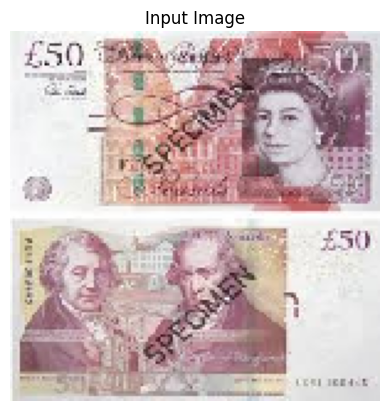

1/1 [==============================] - 0s 11ms/step
Predicted Class: GBP


In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#Loading and preprocessing the test image:
test_image_path = 'poundtown.jpeg'  
img_width, img_height = 150, 150  

#Loading the image and resizing to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Display the input image:
plt.imshow(test_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

#Converting the image to an array and adding a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1)

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys())  
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)

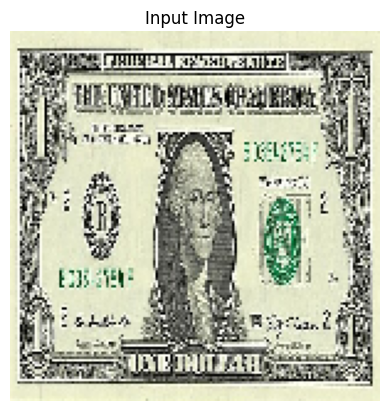

1/1 [==============================] - 0s 14ms/step
Predicted Class: USD


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#Loading and preprocessing the test image:
test_image_path = '1d.jpg'  
img_width, img_height = 150, 150  

#Loading the image and resizing to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Display the input image:
plt.imshow(test_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

#Converting the image to an array and adding a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1)

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys())  
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)

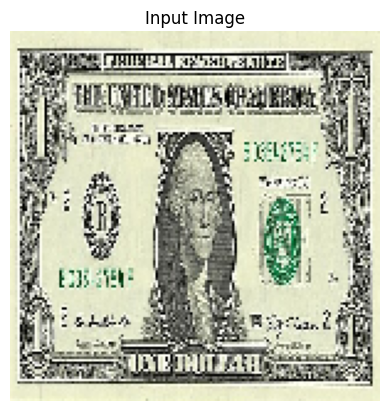

1/1 [==============================] - 0s 11ms/step
Predicted Class: USD


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#Loading and preprocessing the test image:
test_image_path = 'doll.jpg'  
img_width, img_height = 150, 150  

#Loading the image and resizing to match the input dimensions:
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

#Display the input image:
plt.imshow(test_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

#Converting the image to an array and adding a batch dimension:
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  
test_image_array /= 255.0 

#Predicting the class of the image:
prediction = model.predict(test_image_array)
predicted_class = np.argmax(prediction, axis=1)

#Maping the predicted class index to the corresponding label:
class_labels = list(train_generator.class_indices.keys())  
predicted_label = class_labels[predicted_class[0]]
print("Predicted Class:", predicted_label)